# **SVM**

https://developer.ibm.com/tutorials/awb-classifying-data-svm-algorithm-python/

## **Theory**

## **Practical**

### **Scratch Implementation**

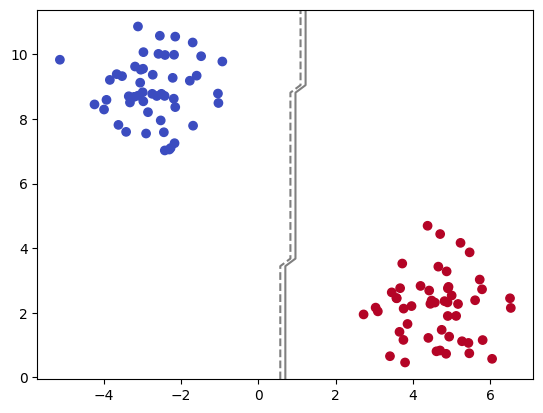

In [49]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param  # Regularization parameter (equivalent to 1/C)
        self.n_iters = n_iters
        self.w = None  # Weight vector
        self.b = None  # Bias term

    def fit(self, X, y):
        """
        Train the SVM model using gradient descent.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)
        - y: np.ndarray, shape (n_samples,), with labels either -1 or 1
        """
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Ensure y has values -1 or 1
        y = np.where(y <= 0, -1, 1)

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                if condition:
                    # No hinge loss: update weights only for regularization
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Hinge loss present: update weights and bias
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        """
        Predict class labels for input data.

        Parameters:
        - X: np.ndarray, shape (n_samples, n_features)

        Returns:
        - Predictions: np.ndarray, shape (n_samples,), with labels either -1 or 1
        """
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

# Example usage:
if __name__ == "__main__":
    # Generate synthetic data for testing
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    # Create 2D data with two classes
    X, y = make_blobs(n_samples=100, centers=2, random_state=42)

    # Convert labels from {0, 1} to {-1, 1}
    y = np.where(y == 0, -1, 1)

    # Train SVM
    svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
    svm.fit(X, y)

    # Plot decision boundary
    def plot_decision_boundary(X, y, model):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # Create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 50)
        yy = np.linspace(ylim[0], ylim[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = model.predict(xy).reshape(XX.shape)

        # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        plt.show()

    plot_decision_boundary(X, y, svm)


### workout

In [50]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [51]:
X,y = make_classification(n_classes=2,n_features=2,n_samples=500,n_redundant=0,n_clusters_per_class=2)

In [52]:
X.shape

(500, 2)

Visualize data

<Axes: >

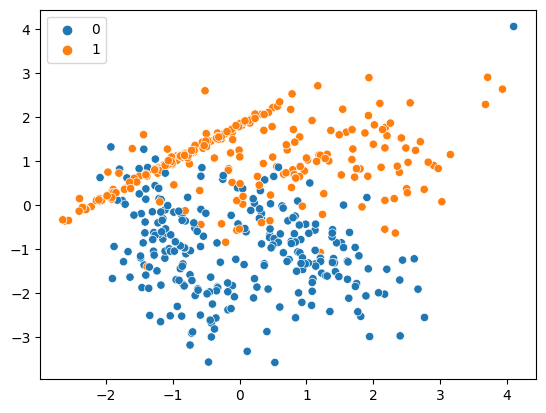

In [53]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [80]:
svc = SVC(kernel='rbf')

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [83]:
accuracy_score(y_pred,y_test)

0.9

In [85]:
import matplotlib.colors as colors

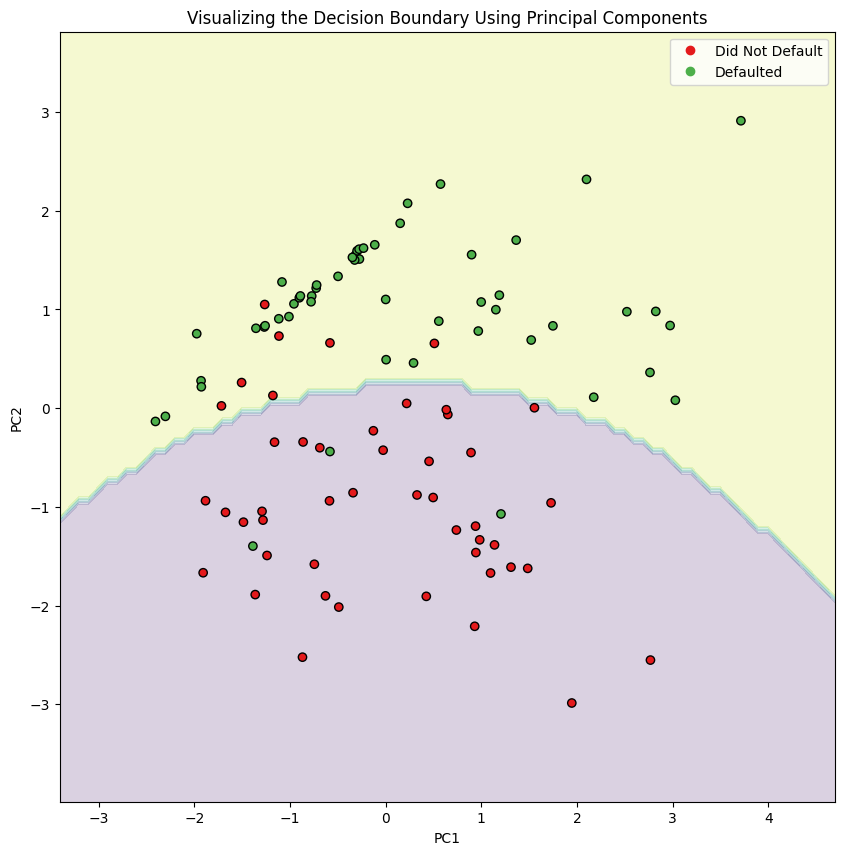

In [102]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(X_train, y_train)

test_pc1_coords = X_test[:, 0]
test_pc2_coords = X_test[:, 1]
x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1
y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),np.arange(start=y_min, stop=y_max, step=0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

# visualizing the data
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, Z, alpha=0.2)
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test,cmap=cmap,edgecolors='k')
legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')
legend.get_texts()[0].set_text('Did Not Default')
legend.get_texts()[1].set_text('Defaulted')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Visualizing the Decision Boundary Using Principal Components')
plt.show()